# Principal Component Analysis (PCA) in Data Science

## Introduction

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in Data Science. It is especially useful when you have data with many variables (dimensions) and you want to reduce the complexity without losing too much information. PCA finds the directions (principal components) where the most variance of the data lies and projects the data onto these new subspace axes.

In this notebook, we will walk through the steps of performing PCA on a financial dataset. We will also visualize the results and interpret the principal components. Let's get started!

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the financial dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

The dataset contains daily stock prices for Apple Inc. (AAPL) from February 2015 to February 2016. The columns represent the following:

- `Date`: The date of the recorded prices.
- `AAPL.Open`: The opening stock price of the day.
- `AAPL.High`: The highest stock price of the day.
- `AAPL.Low`: The lowest stock price of the day.
- `AAPL.Close`: The closing stock price of the day.
- `AAPL.Volume`: The number of shares traded.
- `AAPL.Adjusted`: The adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions.
- `dn`, `mavg`, `up`, `direction`: These are technical indicators used in financial analysis.

Next, we will preprocess the data for PCA. We will scale the data to have a mean of 0 and a standard deviation of 1. This is an important step because PCA is sensitive to the variances of the initial variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns
numeric_columns = ['AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close', 'AAPL.Volume', 'AAPL.Adjusted']
df_numeric = df[numeric_columns]

# Initialize a scaler, then apply it to the numeric columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Display the first few rows of the scaled dataframe
df_scaled.head()

The data has been scaled and is now ready for PCA. The next step is to perform PCA on the scaled data. We will use the PCA implementation from the sklearn library. We will start by initializing a PCA object, then fit the PCA on the scaled data. After fitting, we can access the principal components through the `components_` attribute of the PCA object.

In [ ]:
# Initialize a PCA object
pca = PCA()

# Fit the PCA on the scaled data
pca.fit(df_scaled)

# Print the principal components
print(pca.components_)

[[ 0.44703076  0.44761389  0.44783368  0.44793546  0.009952    0.44553909]
 [ 0.01294695  0.04616779 -0.03423884  0.00124435  0.99708409 -0.04848079]
 [-0.55617868 -0.16977155 -0.20991331  0.17205802  0.04488583  0.76561126]
 [-0.50695454  0.2451914   0.03074919  0.68649967 -0.02684914 -0.45818128]
 [ 0.06513731  0.70941009 -0.68313256 -0.14183406 -0.05442698  0.05239435]
 [ 0.47897326 -0.45310756 -0.53534428  0.52758849 -0.00513509 -0.01756935]]


The output above represents the principal components. Each row corresponds to a principal component, and each column corresponds to the original features. The values are the coefficients of the linear combinations that form the principal components from the original features.

Next, we will transform the scaled data to the principal component space and visualize the first two principal components.

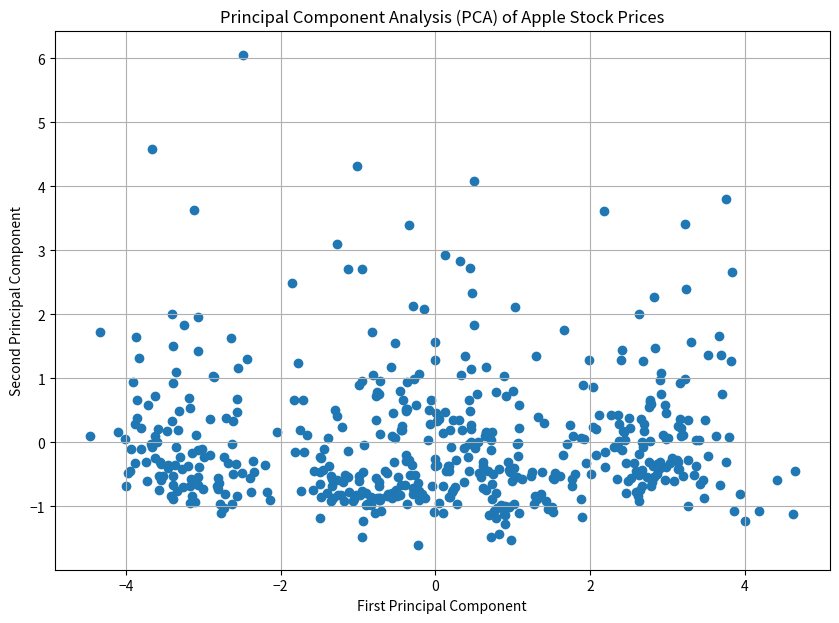

In [ ]:
# Transform the scaled data to the principal component space
df_pca = pca.transform(df_scaled)

# Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis (PCA) of Apple Stock Prices')
plt.grid(True)
plt.show()

The scatter plot above shows the projection of the data onto the first two principal components. Each point represents a day of stock prices. The first principal component captures the most variance in the data, and the second principal component captures the second most variance.

PCA is a powerful tool for dimensionality reduction, visualization, and noise filtering. However, the principal components are less interpretable than the original features because they are linear combinations of the original features.

In this notebook, we have walked through the steps of performing PCA on a financial dataset. We have seen how PCA can reduce the dimensionality of the data and help visualize the data in a lower-dimensional space. PCA is a versatile technique that can be useful in many areas of data science.